In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
 
from weave_units import WeaveUnit
from tile_map import Tiling

In [2]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

## Biaxial weave

<AxesSubplot:>

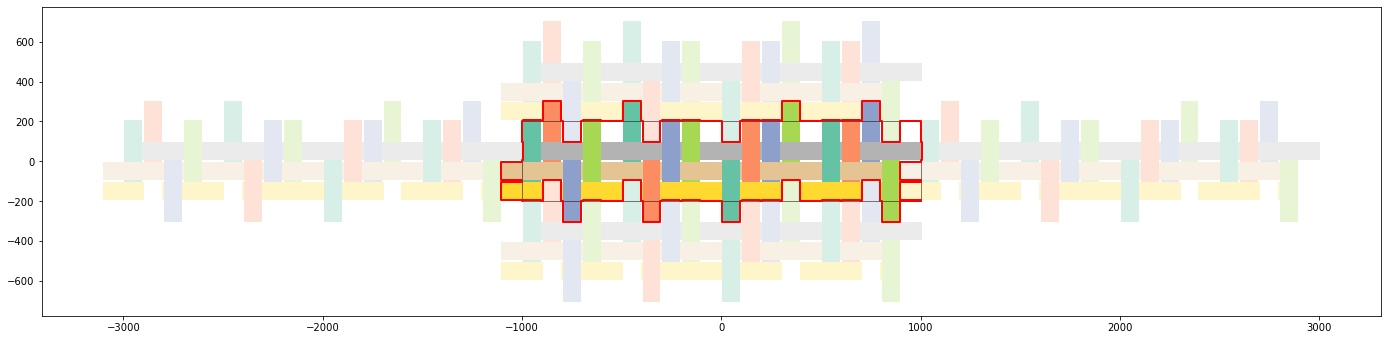

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = .9,
                    margin = 0., strands = "abcd-|efg-", crs = ak.crs)
w1.plot(r = 1, cmap = "Set2", figsize = (24, 8), show_ids = False)

In [4]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")

In [5]:
textile1 = weave1.get_tiled_map(rotation = 20, prioritise_tiles = True)

(<AxesSubplot:>, <Axes:label='inset_axes'>)

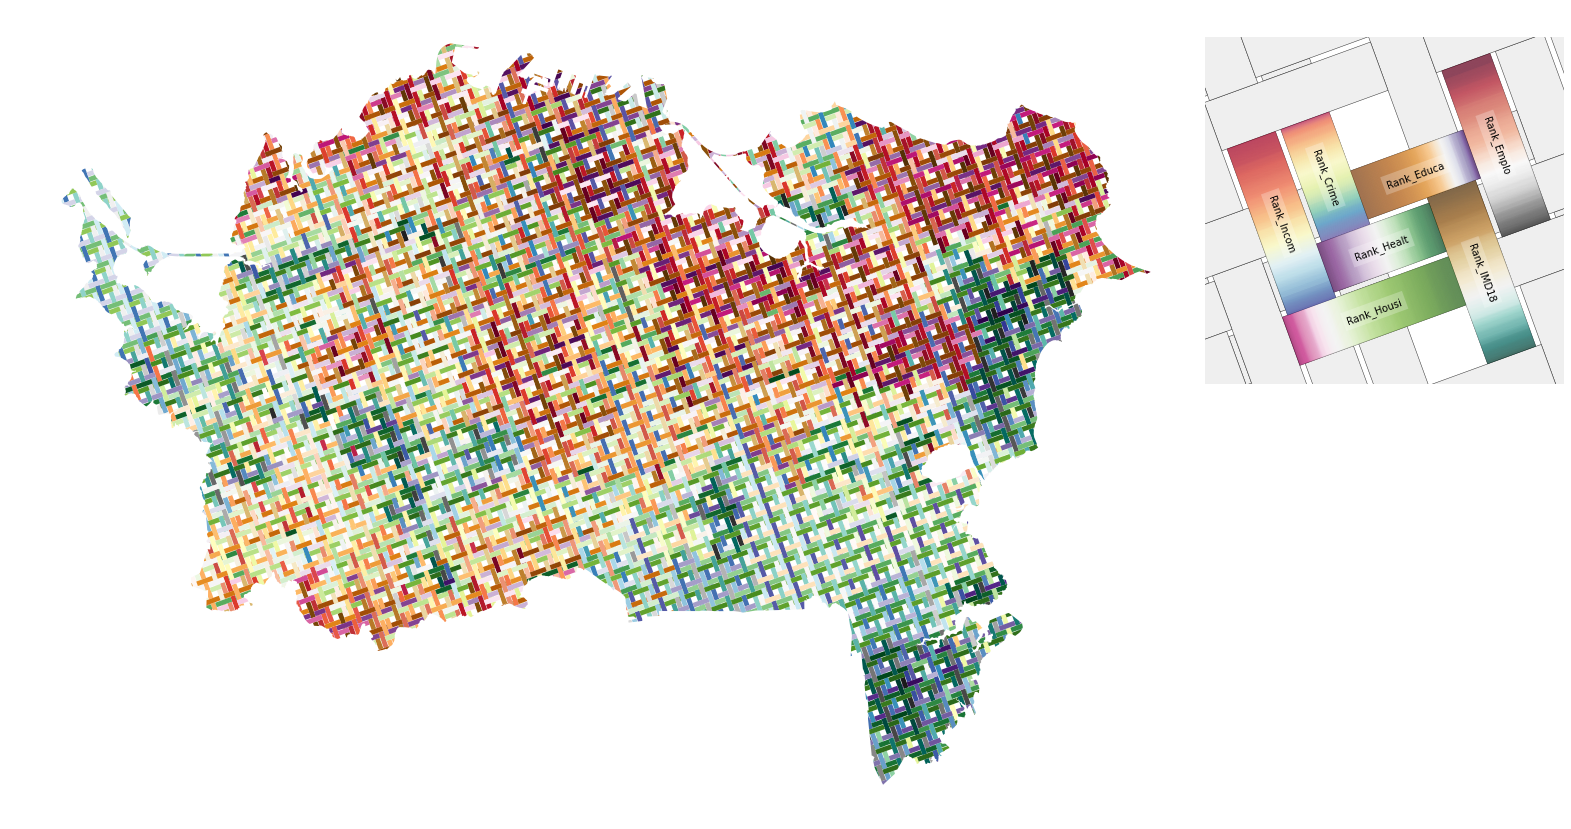

In [11]:
fig = pyplot.figure(figsize = (22.5, 15))

cols = dict(zip(list("abcdefg"),
                [x for x in textile1.columns if "Rank" in x]))
cmaps = dict(zip(list("abcdefg"), 
                 ("BrBG", "RdGy", "RdYlBu", "Spectral",
                  "PiYG", "PRGn", "PuOr")))

weave1.plot_map(fig, textile1, cols, cmaps, legend_zoom = 0.9)

## Triaxial weave

<AxesSubplot:>

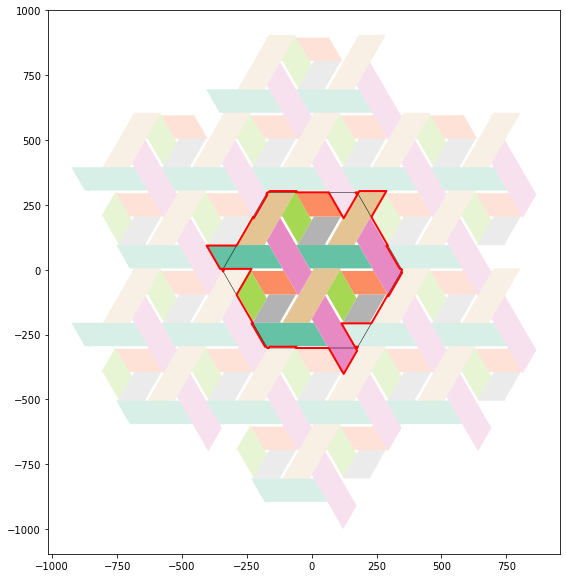

In [7]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = 0.9,
                    margin = .0, strands = "a-c|d-f|g-i", crs = ak.crs)
w2.plot(r = 1, cmap = "Set2", figsize = (10, 10), show_ids = False)

In [8]:
weave2 = Tiling(w2, ak, id_var = "DZ2018")

In [9]:
textile2 = weave2.get_tiled_map(rotation = 20, prioritise_tiles = True)

(<AxesSubplot:>, <Axes:label='inset_axes'>)

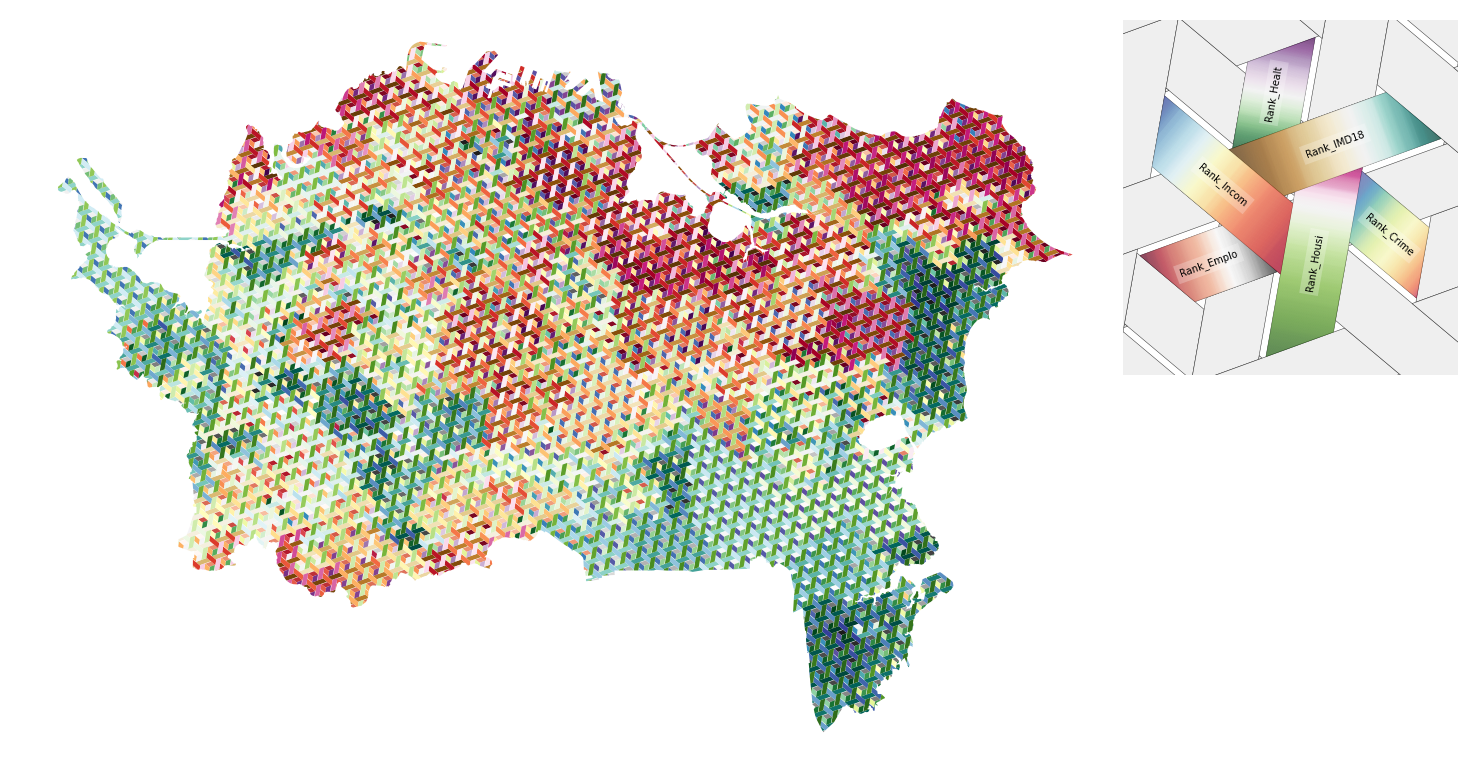

In [12]:
fig = pyplot.figure(figsize = (20, 15))

cols = dict(zip(list("acdfgi"),
                [x for x in textile2.columns if "Rank" in x]))
cmaps = dict(zip(list("acdfgi"),
                 ("BrBG", "RdGy", "RdYlBu", "Spectral",
                  "PiYG", "PRGn", "PuOr", "viridis")))

weave2.plot_map(fig, textile2, cols, cmaps, legend_zoom = 0.9)